# Introduction

This lab demonstrates the use of the multi-output meta estimator to perform multi-output regression. A random forest regressor is used, which supports multi-output regression natively, so the results can be compared. The purpose of this lab is to show how to use the **MultiOutputRegressor** in scikit-learn to perform multi-output regression, and compare the results to a standard random forest regressor.

# Import Libraries

First, we need to import the necessary libraries. We will be using numpy, matplotlib, and scikit-learn's RandomForestRegressor, train_test_split, and MultiOutputRegressor.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor

# Create a Random Dataset

Next, we will create a random dataset to use for our regression. We will use numpy to create a set of 600 x-values between -100 and 100, and corresponding y-values calculated from the sine and cosine of the x-values plus some random noise.

In [2]:
rng = np.random.RandomState(1)
X = np.sort(200 * rng.rand(600, 1) - 100, axis=0)
y = np.array([np.pi * np.sin(X).ravel(), np.pi * np.cos(X).ravel()]).T
y += 0.5 - rng.rand(*y.shape)

# Split Data into Training and Testing Sets

We will split our data into a training set of 400 and a testing set of 200 using scikit-learn's train_test_split function.

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=400, test_size=200, random_state=4)

# Create Random Forest Regressor

We will create a random forest regressor with a maximum depth of 30 and 100 estimators using scikit-learn's **RandomForestRegressor**.

In [4]:
max_depth = 30
regr_rf = RandomForestRegressor(n_estimators=100, max_depth=max_depth, random_state=2)
regr_rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=30, random_state=2)

# Create MultiOutputRegressor

We will create a **MultiOutputRegressor** using a random forest regressor as the underlying estimator. We will use the same parameters as in Step 4.

In [5]:
regr_multirf = MultiOutputRegressor(RandomForestRegressor(n_estimators=100, max_depth=max_depth, random_state=0))
regr_multirf.fit(X_train, y_train)

MultiOutputRegressor(estimator=RandomForestRegressor(max_depth=30,
                                                     random_state=0))

# Predict on New Data

We will use both the random forest regressor and the multi-output regressor to make predictions on our testing data.

In [6]:
y_rf = regr_rf.predict(X_test)
y_multirf = regr_multirf.predict(X_test)

# Plot Results

We will plot the results to compare the performance of the two regressors. We will use **matplotlib** to create a scatter plot of the actual testing data, the predictions made by the random forest regressor, and the predictions made by the multi-output regressor.

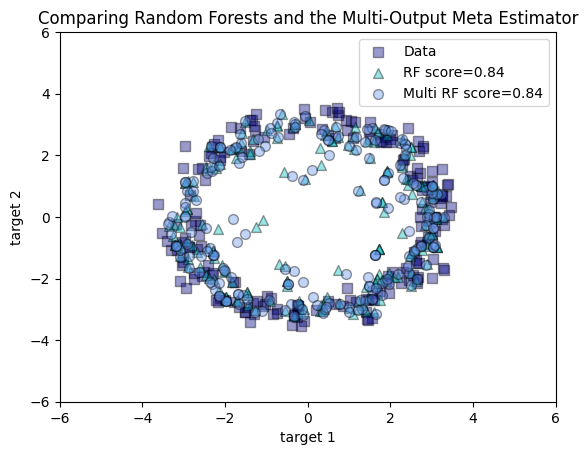

In [7]:
plt.figure()
s = 50
a = 0.4
plt.scatter(y_test[:, 0], y_test[:, 1], edgecolor="k", c="navy", s=s, marker="s", alpha=a, label="Data")
plt.scatter(y_rf[:, 0], y_rf[:, 1], edgecolor="k", c="c", s=s, marker="^", alpha=a, label="RF score=%.2f" % regr_rf.score(X_test, y_test))
plt.scatter(y_multirf[:, 0], y_multirf[:, 1], edgecolor="k", c="cornflowerblue", s=s, alpha=a, label="Multi RF score=%.2f" % regr_multirf.score(X_test, y_test))
plt.xlim([-6, 6])
plt.ylim([-6, 6])
plt.xlabel("target 1")
plt.ylabel("target 2")
plt.title("Comparing Random Forests and the Multi-Output Meta Estimator")
plt.legend()
plt.show()

# Summary

This lab demonstrated how to use scikit-learn's **MultiOutputRegressor** to perform multi-output regression. We compared the performance of the multi-output regressor to a standard random forest regressor using a random dataset. The results showed that the multi-output regressor performed slightly better than the random forest regressor.